<a href="https://colab.research.google.com/github/EvgeniiVorobevIg/Analysis/blob/main/test_difficulty_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

https://drive.google.com/file/d/1Fg3bvX2NOzd3pqcEkH8-epbZFll60-36

In [ ]:
!gdown --id 1Fg3bvX2NOzd3pqcEkH8-epbZFll60-36

Downloading...
From: https://drive.google.com/uc?id=1Fg3bvX2NOzd3pqcEkH8-epbZFll60-36
To: /content/plr_smpl_attempts.csv.gz
87.6MB [00:01, 85.6MB/s]


In [ ]:
df = pd.read_csv('/content/plr_smpl_attempts.csv.gz',sep=';')

In [ ]:
len(df)

22231214

In [ ]:
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640


Описание задачи
Вам нужно исследовать данные о прохождении игроками уровней match3-игры и
выполнить следующие задания:

Задание 1  
Предложить метрику, описывающую сложность уровней, и рассчитать ее.  

Задание 2  
По результатам предыдущего задания разделить уровни на группы по сложности и
сделать вывод о плотности расположения сложных уровней в игре.  
Задание 3  
Рассчитать "воронку" прохождения уровней новым пользователем после установки
игры.  
Также мы хотели бы получить от вас комментарий по выполнению тестового задания.
Он не должен быть очень большим. Нам интересно было бы узнать:
- примерную оценку времени, которое вы потратили на выполнение задания;
- комментарии по сформированной метрике (п1): почему данная метрика будет
показательной;
- возникали ли проблемы при выполнении тестового задания.

Входные данные — файл plr_smpl_attempts.csv.gz, содержащий лог событий за
определенный промежуток времени по первым 500 уровням в игре.
Файл содержит четыре колонки:  
❏ uid — уникальный id игрока;  
❏ action — ‘completed’ для успешной попытки прохождения уровня, ‘failed’ для
неуспешной;  
❏ level — уровень, на котором произошло событие;  
❏ event_time — event_time/1000 является unix timestamp времени получения события.  

Мы ожидаем, что для выполнения задания вы будете использовать Python. Ответ на
задание лучше всего отправлять в формате jupyter notebook.
По срокам выполнения тестового задания мы вас не ограничиваем — вы можете
прислать его, когда будете полностью в нем уверены. Как правило, кандидаты
справляются с ним за одну рабочую неделю.

In [ ]:
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640


In [ ]:
df.value_counts('action')

action
failed       18744535
completed     3486679
dtype: int64

In [ ]:
df['action'] = df['action'].replace('failed',1).replace('completed',0)

# Доля неудачных попыток на каждом уровне

In [ ]:
df.groupby('level')['action'].agg(['count','mean'])

,count,mean
level,,
1,25157,0.000676
2,23313,0.037618
3,23634,0.082381
4,21636,0.014513
5,27192,0.236209
...,...,...
496,2062,0.796799
497,1148,0.641986
498,2409,0.833956


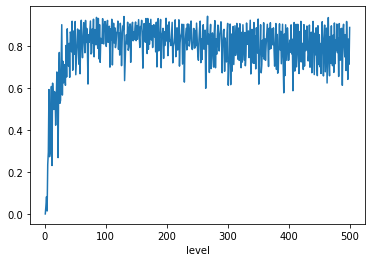

In [ ]:
df.groupby('level')['action'].mean().plot()

# Доля игроков которые не прошли уровень с первого раза

In [ ]:
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640


In [ ]:
t = df[df['level'] == 113].copy()

In [ ]:
t['rnk'] = t.sort_values('event_time').groupby(['level','uid'])['event_time'].rank(method='first')

In [ ]:
t[t['rnk'] == 1]

,uid,action,level,event_time,rnk
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640,1.0
426,RE9iT0VkMmkwMjUwMTI3MTAyMDE4MA,1,113,1512146434418,1.0
1354,cDBlZlZuRjAwMzU1NDE3MTAyMTE4Mg,1,113,1512096831695,1.0
1612,a2FqVG5mcTQyMjcwODA3MTAyOTA4Mg,0,113,1512097744297,1.0
3271,WHNRT1ZPTzQ2MzIzOTA3MTAyMDE0MQ,0,113,1512136177025,1.0
...,...,...,...,...,...
22226613,Z0pxTkk3T2w4MTUxNjE3MTAyMTEyMg,1,113,1514188686859,1.0
22227559,THZIYXZVaU01MjgyMTE3MTAyMTEzMA,1,113,1514204444724,1.0
22227810,SzJvRXcxOEIwMzk0MjE3MTAyOTA4Mg,1,113,1514230050322,1.0
22228410,NGtWM2pCaG43MTI1NDE3MTAyOTAwMw,1,113,1514203803703,1.0


In [ ]:
tt = t.sort_values('event_time').groupby(['level','uid'])[['event_time','action']].first().reset_index()

In [ ]:
tt[tt['uid'] == 'M000Y3dYeUUyMjIxODE3MTAyOTAwMQ']

,level,uid,event_time,action
0,113,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1513482740555,1


In [ ]:
t[(t['rnk'] == 1)&(t['uid']=='M000Y3dYeUUyMjIxODE3MTAyOTAwMQ')]

,uid,action,level,event_time,rnk
10987832,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513482740555,1.0


In [ ]:
t[t['uid']=='M000Y3dYeUUyMjIxODE3MTAyOTAwMQ'].sort_values('event_time')

,uid,action,level,event_time,rnk
10987828,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513482740555,5.0
10987829,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513482740555,4.0
10987830,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513482740555,3.0
10987831,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513482740555,2.0
10987832,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513482740555,1.0
10987836,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513540538178,7.0
10987837,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513540538178,6.0
10987838,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513542854279,8.0
10987839,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513542854279,10.0
10987840,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513542854279,9.0


In [ ]:
len(df)

22231214

In [ ]:
len(df.drop_duplicates())

10387712

In [ ]:
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,1,113,1512086924640


In [ ]:
df.columns

Index(['uid', 'action', 'level', 'event_time'], dtype='object')

In [ ]:
df = df.groupby(['uid', 'action', 'level', 'event_time'])['uid'].count()

In [ ]:
df.name = 'count'

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,uid,action,level,event_time,count
0,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,1,95,1513224808476,5
1,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,1,95,1513253353017,1
2,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,1,95,1513253543747,2
3,M000MjVPdEM0MzMzNzA3MTAyMDE5MQ,1,95,1513261453988,6
4,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,0,90,1512249715495,1


In [ ]:
df[(df['uid']=='M000Y3dYeUUyMjIxODE3MTAyOTAwMQ')&(df['level']==113)].sort_values('event_time')

,uid,action,level,event_time,count
76,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513482740555,5
77,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513540538178,2
78,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513542854279,3
79,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513547997358,3
80,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,113,1513553908542,3


In [ ]:
t = df.sort_values(['level','uid','event_time']).groupby(['level','uid']).first().reset_index()

In [ ]:
t[(t['uid']=='M000Y3dYeUUyMjIxODE3MTAyOTAwMQ')&(t['level']==113)].sort_values('event_time')

,level,uid,action,event_time,count
1838469,113,M000Y3dYeUUyMjIxODE3MTAyOTAwMQ,1,1513482740555,5


In [ ]:
t.sample(5)

,level,uid,action,event_time,count
1470944,91,cGlrbVhNNTAyNTE1NzE3MTAyMjE4MA,0,1514679041474,1
2396389,147,ZDh0SlByc2w3MTYyMDA3MTAyMDEyMg,1,1514745544059,2
190794,10,REJaZjBBeDA3MDAyMzI3MTAyMjEwMQ,0,1512984233207,1
1650929,102,N0pZTkNuYlczMTUyOTA3MTAyMDE4Mg,1,1512784652603,5
1675785,103,TTNqY3V0blA1MjEzMDA3MTAyMDE0Mg,0,1513404004634,1


In [ ]:
df[(df['uid']=='cGlrbVhNNTAyNTE1NzE3MTAyMjE4MA')&(df['level']==91)].sort_values('event_time')

,uid,action,level,event_time,count
8814631,cGlrbVhNNTAyNTE1NzE3MTAyMjE4MA,0,91,1514679041474,1
8814690,cGlrbVhNNTAyNTE1NzE3MTAyMjE4MA,1,91,1514679041474,2


In [ ]:
t[(t['uid']=='cGlrbVhNNTAyNTE1NzE3MTAyMjE4MA')&(t['level']==91)].sort_values('event_time')

,level,uid,action,event_time,count
1470944,91,cGlrbVhNNTAyNTE1NzE3MTAyMjE4MA,0,1514679041474,1


In [ ]:
t.columns = ['level', 'uid', 'failed', 'event_time', 'count']

In [ ]:
t.head()

,level,uid,failed,event_time,count
0,1,M001TWRFNWc5MjQ1MDI3MTAyMjE5MA,0,1512855813696,1
1,1,M001VTlGalU5MzcwMTI3MTAyMjE5Mg,0,1514578577760,1
2,1,M010Z2VmOFgzMzgwMTI3MTAyMjE4Mg,0,1514489117415,1
3,1,M01QQlBMVmo1NTcyODA3MTAyMjE4MQ,0,1513557080655,1
4,1,M01TMDNDdzA0MDkwNzE3MTAyMjE2MA,0,1512535403271,1


In [ ]:
t['comleted'] = t['failed'].apply(lambda x: 1 if 0 else 0)

In [ ]:
t['failed'].replace(0,1).replace(1,0)

0          0
1          0
2          0
3          0
4          0
          ..
3803853    0
3803854    0
3803855    0
3803856    0
3803857    0
Name: failed, Length: 3803858, dtype: int64

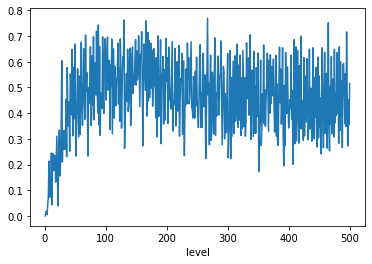

In [ ]:
t.groupby('level')['failed'].mean().plot()

In [ ]:
df = pd.read_csv('/content/plr_smpl_attempts.csv.gz',sep=';')

In [ ]:
t = df.groupby(['uid','event_time'])['uid'].count()

In [ ]:
t.sort_values()

uid                             event_time   
enpzeGNhWUk4MjE0MzE3MTAyMDE5MA  1514674966884       1
YzNLQ25tWTU4NTgzMjI3MTAyMDEyMA  1513914594387       1
RUxHSnZTV3o5MTQyMTI3MTAyOTAyMg  1513744264460       1
YzNMczF1RVUyMjMyMzI3MTAyMDE1MQ  1513675368301       1
                                1513705431024       1
                                                 ... 
dlE1TGo1ZjU1NDExOTA3MTAyMDE5MA  1514078786418    1182
SHIwdkltZlk0NTUxNjE3MTAyOTA5Mg  1514006798622    1233
Z3o0TmFoeTQ1MjMyOTE3MTAyOTAxMg  1513449317511    1408
U0NVNk4xSlAxMjc0MzE3MTAyMDE1MA  1514463213261    1561
NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg  1514370274359    1688
Name: uid, Length: 5486162, dtype: int64

In [ ]:
df[(df['uid']=='NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg')&(df['event_time']==1514370274359)]

,uid,action,level,event_time
9641711,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,completed,263,1514370274359
9641712,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,failed,263,1514370274359
9641713,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,completed,262,1514370274359
9641714,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,failed,262,1514370274359
9641715,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,failed,262,1514370274359
...,...,...,...,...
9643394,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,failed,143,1514370274359
9643395,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,failed,143,1514370274359
9643396,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,failed,143,1514370274359
9643397,NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg,failed,143,1514370274359


In [ ]:
df[(df['uid']=='NWVTWWt4UzIxMDUxMTA3MTAyOTA5Mg')&(df['event_time']==1514370274359)]['level'].value_counts()

154    344
144     77
197     54
214     53
167     50
      ... 
212      1
211      1
190      1
202      1
203      1
Name: level, Length: 121, dtype: int64

# Доля тех кто отваливается поле уровня: либо на всегда, либо на время

# Количество уникальных пользователей играющих на уровне

Задание 1  
Предложить метрику, описывающую сложность уровней, и рассчитать ее.  

Задание 2  
По результатам предыдущего задания разделить уровни на группы по сложности и
сделать вывод о плотности расположения сложных уровней в игре.  
Задание 3  
Рассчитать "воронку" прохождения уровней новым пользователем после установки
игры.  

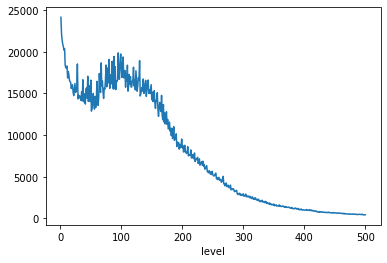

In [ ]:
df.groupby('level')['uid'].nunique().plot()

In [ ]:
df['failed'] = df['action'].replace('failed',1).replace('completed',0)

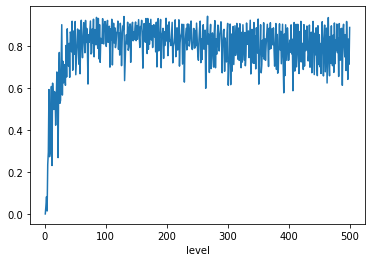

In [ ]:
df.groupby('level')['failed'].mean().plot()

In [ ]:
df['uid'].nunique()

196088

In [ ]:
df

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
...,...,...,...,...
22231209,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163
22231210,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,214,1514189810163
22231211,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,completed,213,1514189810163
22231212,R2l2aXM5bGM1MTExMzE3MTAyMDE4MQ,failed,213,1514189810163


In [ ]:
df['dt'] = pd.to_datetime(df['event_time']/1000,unit='s')

In [ ]:
df.head()

,uid,action,level,event_time,dt
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640000105
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640000105
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640000105
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640000105
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640,2017-12-01 00:08:44.640000105


In [ ]:
df['dt'].agg(['min','max'])

min   2017-12-01 00:00:00.272000074
max   2017-12-31 23:59:59.867000103
Name: dt, dtype: datetime64[ns]

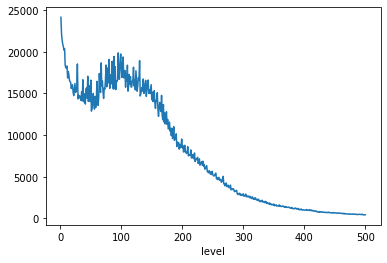

In [ ]:
df.groupby('level')['uid'].nunique().plot()

In [ ]:
df['uid'].nunique() * 31

6078728

1 1 89
1 2 -
1 3 - 

Задание 1  
Предложить метрику, описывающую сложность уровней, и рассчитать ее.  

Задание 2  
По результатам предыдущего задания разделить уровни на группы по сложности и
сделать вывод о плотности расположения сложных уровней в игре.  
Задание 3  
Рассчитать "воронку" прохождения уровней новым пользователем после установки
игры.  

In [ ]:
df['day'] = df['dt'].dt.date

In [ ]:
t = df.groupby('uid')['day'].min()

In [ ]:
t = t.reset_index()

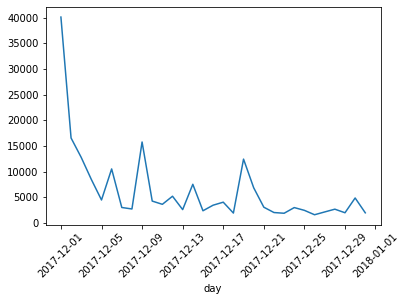

In [ ]:
t.groupby('day')['uid'].count().plot(rot=45)

In [ ]:
df['uid'].nunique()

196088

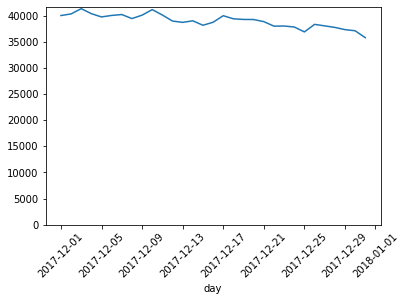

In [ ]:
df.groupby('day')['uid'].nunique().plot(rot=45,ylim=0)

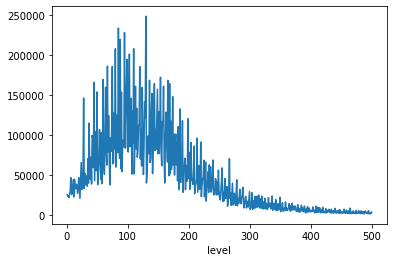

In [ ]:
df.groupby('level')['uid'].count().plot()

In [ ]:
t = df.groupby(['level','uid'])['uid'].count()

In [ ]:
t.name = 'count'

In [ ]:
t = t.reset_index()

In [ ]:
t.head()

,level,uid,count
0,1,M001TWRFNWc5MjQ1MDI3MTAyMjE5MA,1
1,1,M001VTlGalU5MzcwMTI3MTAyMjE5Mg,1
2,1,M010Z2VmOFgzMzgwMTI3MTAyMjE4Mg,1
3,1,M01QQlBMVmo1NTcyODA3MTAyMjE4MQ,1
4,1,M01TMDNDdzA0MDkwNzE3MTAyMjE2MA,1


In [ ]:
tt = t.groupby('level')['count'].agg(['count','mean','median'])

In [ ]:
tt.head()

,count,mean,median
level,,,
1,24162,1.041180,1.0
2,22177,1.051224,1.0
3,21415,1.103619,1.0
4,20916,1.034423,1.0
5,20625,1.318400,1.0


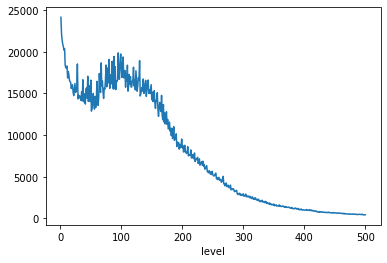

In [ ]:
tt['count'].plot()

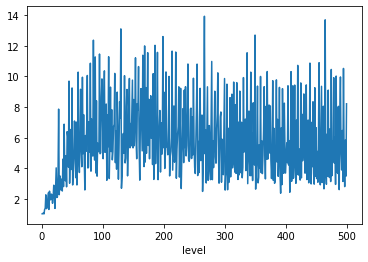

In [ ]:
tt['mean'].plot()

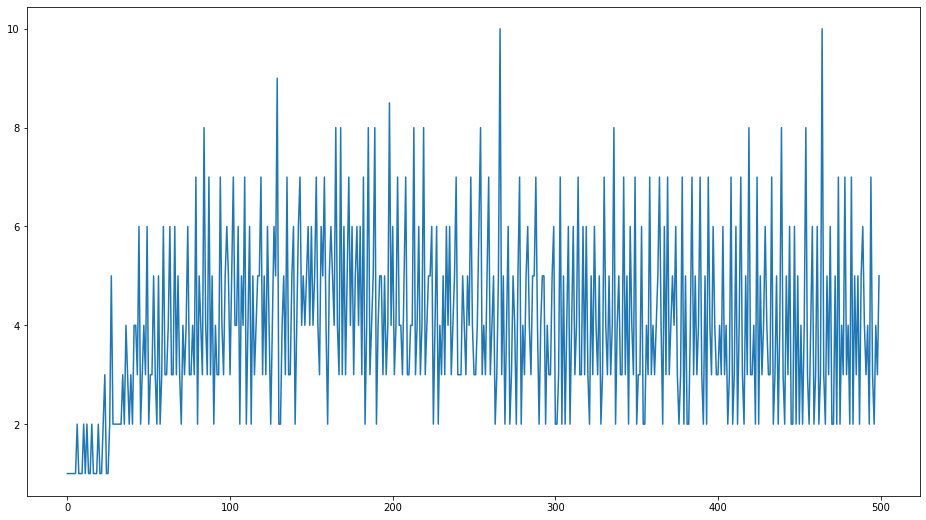

In [ ]:
tt['median'].plot(figsize=(16,9))

In [ ]:
tt = tt.reset_index('level')

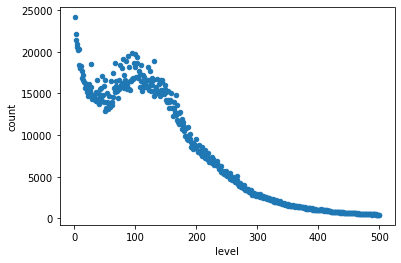

In [ ]:
tt.plot(x='level',y='count',kind='scatter')

In [ ]:
tt['median']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
495    3.0
496    2.0
497    4.0
498    3.0
499    5.0
Name: median, Length: 500, dtype: float64

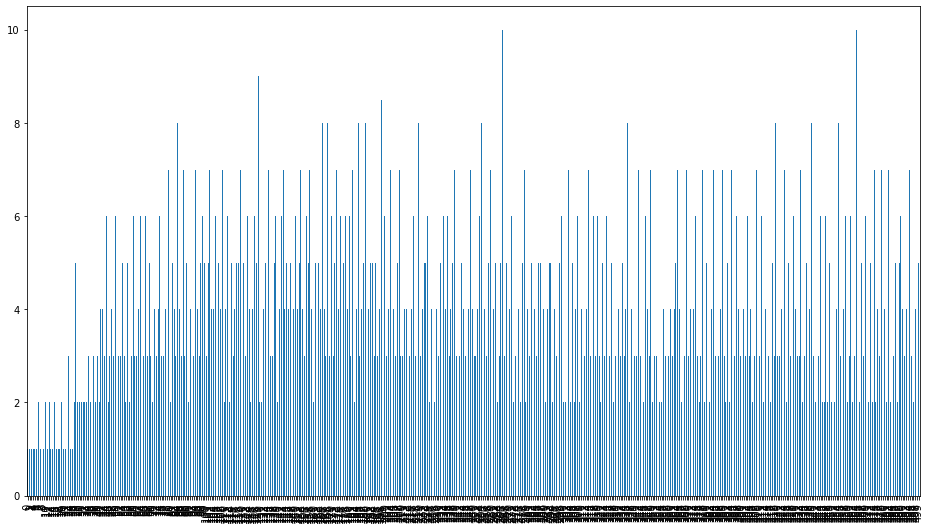

In [ ]:
tt['median'].plot(kind='bar',figsize=(16,9))

In [ ]:
t = tt['median'].reset_index()

In [ ]:
t['median'].value_counts()

3.0     124
4.0      94
2.0      88
5.0      70
6.0      50
7.0      39
1.0      19
8.0      12
10.0      2
8.5       1
9.0       1
Name: median, dtype: int64

Посмотреть только на тех пользователей, которые прошли с 1 до 200. с 1 по 400. 